## Advanced Housing Prices- Feature Engineering
The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

Dataset to downloaded from the below link

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

We will be performing all the below steps in Feature Engineering

Missing values
Temporal variables
Categorical variables: remove rare labels
Standarise the values of the variables to the same rang

In [4]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [5]:
data_df = pd.read_csv('train.csv')
print(data_df.info())
data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Missing values

#### Categorical features

In [6]:
# Capture all NaN values

features_nan = [col for col in data_df.columns if data_df[col].isnull().sum()>1 
                and data_df[col].dtype == 'O']

print(len(features_nan), '\n - - \n', features_nan)

15 
 - - 
 ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [7]:
# % of NaN values 

for feature in features_nan:
    print(feature, '\t', np.round(data_df[feature].isnull().mean()*100, 4))

Alley 	 93.7671
MasVnrType 	 0.5479
BsmtQual 	 2.5342
BsmtCond 	 2.5342
BsmtExposure 	 2.6027
BsmtFinType1 	 2.5342
BsmtFinType2 	 2.6027
FireplaceQu 	 47.2603
GarageType 	 5.5479
GarageFinish 	 5.5479
GarageQual 	 5.5479
GarageCond 	 5.5479
PoolQC 	 99.5205
Fence 	 80.7534
MiscFeature 	 96.3014


In [ ]:
np.round(data_df[features_nan].isnull().mean()*100, 4)

In [79]:
# replacing missing values with new label

def replace_nan_CF(dataset, nan_features):
    df = dataset.copy()
    df[nan_features] = df[nan_features].fillna('missing')
    return df

data_df = replace_nan_CF(data_df, features_nan)

data_df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [ ]:
data_df.head()

#### Numerical features

In [80]:

features_nan_num = [col for col in data_df.columns if data_df[col].isnull().sum()>1 
                   and data_df[col].dtypes != 'O']

print(len(features_nan_num), features_nan_num)


3 ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [ ]:
# Cal extent

np.round(data_df[features_nan_num].isnull().mean()*100, 4)

In [81]:
# replace missing values numerical

#def replace_na_num(dataset, nan_features):
for feature in features_nan_num:
    median_val = data_df[feature].median()
    
    #create new col where null is 1 and filled is 0
    data_df[feature+'_nan'] = np.where(data_df[feature].isnull(), 1, 0)
    data_df[feature].fillna(median_val, inplace=True)
    
print(data_df[features_nan_num].isnull().sum())
data_df[[col+'_nan' for col in features_nan_num]]
        

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64


,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1455,0,0,0
1456,0,0,0
1457,0,0,0
1458,0,0,0


In [ ]:
data_df.head(15)

In [ ]:
data_df.filter(regex = 'nan') # selecting cols with 'nan' in col-name

#### Temporal variables:

In [82]:

features_temporal = [col for col in data_df.columns if 'Year' in col or 'Yr' in col]
features_temporal

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBlt_nan']

In [ ]:
data_df[features_temporal].info()

In [83]:
# coverting temporal variables to a relation with 'yearSold'. 
# This converts the features into numeric variable, which gives proper value to model.

features_temporal.remove('YrSold')
features_temporal.remove('GarageYrBlt_nan')

for col in features_temporal:
    data_df[col] = data_df['YrSold'] - data_df[col]

In [ ]:
data_df[features_temporal+['YrSold','GarageYrBlt_nan']].head(10)

In [84]:
# from exloratory analysis done earlier, below features have skewed values 
# .i.e. do not follow gussian distribution
# Hence transforming them by log normal distribution

log_features = ['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'GrLivArea']
data_df[log_features]

,LotFrontage,LotArea,1stFlrSF,2ndFlrSF,SalePrice,GrLivArea
0,65.0,8450,856,854,208500,1710
1,80.0,9600,1262,0,181500,1262
2,68.0,11250,920,866,223500,1786
3,60.0,9550,961,756,140000,1717
4,84.0,14260,1145,1053,250000,2198
...,...,...,...,...,...,...
1455,62.0,7917,953,694,175000,1647
1456,85.0,13175,2073,0,210000,2073
1457,66.0,9042,1188,1152,266500,2340
1458,68.0,9717,1078,0,142125,1078


In [85]:
# applying log normal distribution

for feature in log_features:
    data_df[feature] = np.log(data_df[feature])

data_df[log_features]

/Users/md.thousif/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,LotFrontage,LotArea,1stFlrSF,2ndFlrSF,SalePrice,GrLivArea
0,4.174387,9.041922,6.752270,6.749931,12.247694,7.444249
1,4.382027,9.169518,7.140453,-inf,12.109011,7.140453
2,4.219508,9.328123,6.824374,6.763885,12.317167,7.487734
3,4.094345,9.164296,6.867974,6.628041,11.849398,7.448334
4,4.430817,9.565214,7.043160,6.959399,12.429216,7.695303
...,...,...,...,...,...,...
1455,4.127134,8.976768,6.859615,6.542472,12.072541,7.406711
1456,4.442651,9.486076,7.636752,-inf,12.254863,7.636752
1457,4.189655,9.109636,7.080026,7.049255,12.493130,7.757906
1458,4.219508,9.181632,6.982863,-inf,11.864462,6.982863


#### Handling categorical features
 - 1. Remove categorical features that are less than 1% of the observations

In [86]:

features_cat = [col for col in data_df.columns if data_df[col].dtype=='O']

len(features_cat), features_cat

(43,
 ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'PoolQC',
  'Fence',
  'MiscFeature',
  'SaleType',
  'SaleCondition'])

In [ ]:
len(data_df) # gives no of rows

In [8]:
data_df.groupby('SaleType').count()/len(data_df)#['SalePrice']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
SaleType,,,,,,,,,,,,,,,,,,,,,
COD,0.029452,0.029452,0.029452,0.021918,0.029452,0.029452,0.002055,0.029452,0.029452,0.029452,...,0.029452,0.029452,0.000000,0.008904,0.001370,0.029452,0.029452,0.029452,0.029452,0.029452
CWD,0.002740,0.002740,0.002740,0.002740,0.002740,0.002740,0.000685,0.002740,0.002740,0.002740,...,0.002740,0.002740,0.000000,0.001370,0.000000,0.002740,0.002740,0.002740,0.002740,0.002740
Con,0.001370,0.001370,0.001370,0.001370,0.001370,0.001370,0.000000,0.001370,0.001370,0.001370,...,0.001370,0.001370,0.000000,0.000000,0.000000,0.001370,0.001370,0.001370,0.001370,0.001370
ConLD,0.006164,0.006164,0.006164,0.005479,0.006164,0.006164,0.000000,0.006164,0.006164,0.006164,...,0.006164,0.006164,0.000000,0.001370,0.000685,0.006164,0.006164,0.006164,0.006164,0.006164
ConLI,0.003425,0.003425,0.003425,0.002740,0.003425,0.003425,0.000685,0.003425,0.003425,0.003425,...,0.003425,0.003425,0.000000,0.000685,0.000685,0.003425,0.003425,0.003425,0.003425,0.003425
ConLw,0.003425,0.003425,0.003425,0.003425,0.003425,0.003425,0.000000,0.003425,0.003425,0.003425,...,0.003425,0.003425,0.000000,0.000000,0.000000,0.003425,0.003425,0.003425,0.003425,0.003425
New,0.083562,0.083562,0.083562,0.082877,0.083562,0.083562,0.004795,0.083562,0.083562,0.083562,...,0.083562,0.083562,0.000685,0.000000,0.000000,0.083562,0.083562,0.083562,0.083562,0.083562
Oth,0.002055,0.002055,0.002055,0.002055,0.002055,0.002055,0.000000,0.002055,0.002055,0.002055,...,0.002055,0.002055,0.000000,0.000685,0.000685,0.002055,0.002055,0.002055,0.002055,0.002055
WD,0.867808,0.867808,0.867808,0.700000,0.867808,0.867808,0.054110,0.867808,0.867808,0.867808,...,0.867808,0.867808,0.004110,0.179452,0.033562,0.867808,0.867808,0.867808,0.867808,0.867808


In [87]:
# Calculating % contribution of a feature for the dataset.
# .i.e. No of unique values / total no of rows


for col in features_cat:
    df = data_df.groupby(col).count()['SalePrice']/len(data_df)
    temp_df = df[df>0.01].index
    data_df[col] = np.where(data_df[col].isin(temp_df), data_df[col], 'Rare_Var')
    
data_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,...,missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,...,missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,...,missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,...,missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,...,missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [ ]:
data_df.groupby('Alley').count()['SalePrice']/len(data_df)

In [ ]:
data_df.groupby('SaleType').count()

In [ ]:
data_df.head(50)

#### Labeling categorical feature's values as numerical representations

In [9]:
labels_ordered=data_df.groupby('Street').mean()['SalePrice'].sort_values().index
print(labels_ordered)
labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
labels_ordered


Index(['Grvl', 'Pave'], dtype='object', name='Street')


{'Grvl': 0, 'Pave': 1}

In [ ]:
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
s

In [ ]:
#map accepts a dict or a Series. 
#Values that are not found in the dict are converted to NaN, unless the dict has a default value

s.map({'cat': 'kitten', 'dog': 'puppy'})

In [ ]:
s.map('I am a {}'.format)

In [ ]:
s.map('I am a {}'.format, na_action='ignore')

In [ ]:
#Enumerate is a built-in function of Python. 
#Its usefulness can not be summarized in a single line. 
#Yet most of the newcomers and even some advanced programmers are unaware of it. 
#It allows us to loop over something and have an automatic counter. Here is an example:

my_list = ['apple', 'banana', 'grapes', 'pear']
#for counter, value in enumerate(my_list):
for counter, value in enumerate(my_list, 1):
    print(counter, value)

In [ ]:
#Applying labelling on the rank of mean()

for feature in features_cat:
    labels_ordered=data_df.groupby([feature]).mean()['SalePrice'].sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    print(labels_ordered)

In [89]:
## Labeling categorical var

for feature in features_cat:
    labels_ordered=data_df.groupby([feature]).mean()['SalePrice'].sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data_df[feature]=data_df[feature].map(labels_ordered)
    
data_df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,2,0,12,2008,2,3,12.429216,0,0,0
5,6,50,3,4.442651,9.554993,1,2,1,1,1,...,1,700,10,2009,2,3,11.870600,0,0,0
6,7,20,3,4.317488,9.218705,1,2,0,1,1,...,2,0,8,2007,2,3,12.634603,0,0,0
7,8,60,3,4.234107,9.247829,1,2,1,1,1,...,1,350,11,2009,2,3,12.206073,1,0,0
8,9,50,1,3.931826,8.719317,1,2,0,1,1,...,2,0,4,2008,2,0,11.774520,0,0,0
9,10,190,3,3.912023,8.911934,1,2,0,1,1,...,2,0,1,2008,2,3,11.678440,0,0,0


In [ ]:
data_df.isnull()

In [ ]:
data_df.info()

In [10]:
for col in data_df.columns:
    x=data_df[col].isnull().sum()
    if x>0:
        print( col, x)
    #print(data_df.iloc[ind])

cols = [col for col in data_df.columns if data_df[col].dtype=='float64']
cols
data_df[cols]

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [101]:
data_df['2ndFlrSF'].replace(np.inf, 'NaN' , inplace=True)
mn=data_df['2ndFlrSF']


In [95]:
data_df['2ndFlrSF'].replace('NaN', 0, inplace=True)
mn=data_df['2ndFlrSF'].mean()
data_df['2ndFlrSF'].replace(0, mn, inplace=True)
data_df['2ndFlrSF']

0       6.749931
1       2.863969
2       6.763885
3       6.628041
4       6.959399
          ...   
1455    6.542472
1456    2.863969
1457    7.049255
1458    2.863969
1459    2.863969
Name: 2ndFlrSF, Length: 1460, dtype: float64

In [173]:
# Therefore, all the features are converted to numerical representations. this can now be
# fed to the model for ML operations.

In [ ]:
pd.

#### Train Test split
The features engineered by filling missing values, applying transformations, converting all features to numerical format, first have to be split and the the feature scaling is applied lateron. 

In [96]:
# split the data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data_df, data_df['SalePrice'],
                                    test_size=0.1, random_state=0)

In [97]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1314, 84), (146, 84), (1314,), (146,))

### Using Linear regression

#### Feature Scaling
- Features have magnitude and units;for ex : 
        height(unit-cm)  weights(unit-kg)
            180                     90
            174                     85
            160                     53
- When height vs weight is plotted to calculate euclidian distance, then the distance 
  is very far away. 
  To overcome this scaling is required.
- Many models require or expects scaled features.ex: 
    knn, k means - euclidian distance, 
    leniar regression - gradient dissent(upon scaling convergence happes quickly)
- I.e where ever there is scope of calculating euclidian distance, GD ect in model execution.
  feature scaling is necessary.
    
- Ensemble techniques like decision tree, Random forest, xgboost, bagging and boosting dont need
  feature scaling.

##### Normalization:
    Sacling the values of the features between 0 and 1.
        Xnorm = X-Xmin/Xmax-Xmin
- Normalization is preferred for neural networks as the neural nodes accept the values from 0 to   1, to calculate weights better.
        
##### Standardization(z):
    Here features will be transformed in a way that the feature will have the properties of standard normal distribution with mean(meu u)=0 and standard deviation=1.
        z= x-mean/SD - obtains a bell curve
- Standardization performs well on ML algorithms like knn, linear & logistic regressions.


In [98]:
print(type(X_train)) 
X_train.head(10)
#Y_train.head()


<class 'pandas.core.frame.DataFrame'>


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
930,931,20,3,4.290459,9.096612,1,2,1,3,1,...,2,0,7,2009,2,3,12.211060,0,0,0
656,657,20,3,4.276666,9.211040,1,2,1,1,1,...,2,0,8,2008,2,3,11.887931,0,0,0
45,46,120,3,4.110874,8.943506,1,2,0,1,1,...,2,0,2,2010,2,3,12.675764,0,0,0
1348,1349,20,3,4.234107,9.692520,1,2,2,2,1,...,2,0,8,2007,2,3,12.278393,1,0,0
55,56,20,3,4.605170,9.227689,1,2,1,1,1,...,2,0,7,2008,2,3,12.103486,0,0,0
1228,1229,120,3,4.174387,9.078978,1,2,0,1,1,...,2,0,10,2008,3,4,12.813918,0,0,0
963,964,20,3,4.804021,9.386225,1,2,1,1,1,...,2,0,5,2009,2,3,12.384219,0,0,0
921,922,90,3,4.204693,9.079890,1,2,0,1,1,...,2,0,9,2008,2,3,11.890677,0,0,1
458,459,70,1,4.234107,8.536996,1,0,0,1,1,...,2,0,6,2008,2,3,11.989160,1,0,0
1386,1387,60,3,4.382027,9.722685,1,2,1,1,1,...,0,2000,7,2006,2,3,12.429216,0,0,0


In [106]:
## Feature Scaling

feature_scale = [col for col in X_train.columns if col not in ['Id', 'SalePrice']]
# id unnecessary, SalePrice is prediction(Y) or dependent variable

from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit(X_train[feature_scale])
#X_train[feature_scale]


MinMaxScaler()

In [129]:
X_train_sacled=scalar.transform(X_train[feature_scale])
X_train_sacled

array([[0.        , 0.75      , 0.46117107, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.45606561, ..., 0.        , 0.        ,
        0.        ],
       [0.58823529, 0.75      , 0.39469927, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.41176471, 0.25      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.58823529, 0.75      , 0.4403126 , ..., 1.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.3760328 , ..., 0.        , 0.        ,
        0.        ]])

In [131]:

X_test_scaled = scalar.transform(X_test[feature_scale])

In [116]:
data = pd.concat([X_train[['Id','SalePrice']].reset_index(drop=True),
                pd.DataFrame(scalar.transform(X_train[feature_scale]), columns=feature_scale)],
                axis=1)

In [133]:
#data.info()
data.shape

(1314, 84)

In [172]:
Y_train

930     12.211060
656     11.887931
45      12.675764
1348    12.278393
55      12.103486
          ...    
763     12.727838
835     11.759786
1216    11.626254
559     12.363076
684     12.305918
Name: SalePrice, Length: 1314, dtype: float64

In [145]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [146]:
model.fit(X_train_sacled, Y_train) #training the model

LinearRegression()

In [153]:
model.score(X_test, Y_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 82 is different from 84)

In [154]:
X_test.shape, Y_test.shape

((146, 84), (146,))

In [169]:
model.score(X_test_scaled, Y_test) # returns r2 score.

0.8678629798382044

In [170]:
Y_pred = model.predict(X_test_scaled)

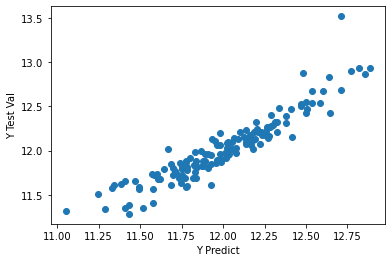

In [171]:
plt.scatter(Y_pred, Y_test)
plt.xlabel('Y Predict')
plt.ylabel('Y Test Val')
plt.show()


### Using Emsembel

In [202]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

reg = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, 
                       random_state=1, loss='square')

In [203]:
reg.fit(X_train[feature_scale], Y_train)

AdaBoostRegressor(learning_rate=0.2, loss='square', n_estimators=100,
                  random_state=1)

In [204]:
reg.score(X_test[feature_scale], Y_test)

0.8261033695441216